In [1]:
import numpy as np 
import scipy
from scipy.optimize import leastsq
import matplotlib.pyplot as plt


# 最小二乘法 $sin2 \pi x$

In [2]:
# 计算函数
def func(x):
    return np.sin(x * 2 * np.pi)
# 多项式函数
def poly(d,x):
    p = np.poly1d(d)
    return p(x)

# 偏差函数
def Deviation(d,x,y):
    x_poly = poly(d,x)
    return (y - x_poly)

In [8]:
# 数据生成
x = np.linspace(0,1,10)
y_ = func(x)

y = np.random.normal(loc = 0,scale=0.1,size = 10) + y_


In [9]:
x_points = np.linspace(0,1,1000)
def fitting(M = 0):
    """
    M 为多项式的维度
    """
    init = np.random.rand(M+1)

    # 最小二乘法
    lsq = leastsq(Deviation,init,args=(x,y))

    print("拟合参数",lsq[0])

    plt.plot(x_points,func(x_points),label = 'Real')
    plt.plot(x_points,poly(lsq[0],x_points),label = 'fit curve')
    plt.plot(x,y,'bo',label = "origin")
    plt.legend()
    return lsq

拟合参数 [-0.02246555]


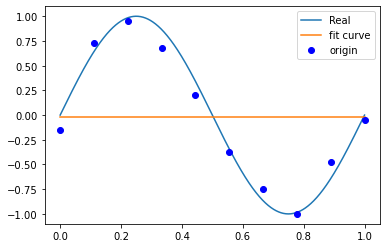

In [10]:
lsq0 = fitting(M =0)

拟合参数 [-1.21130047  0.58318469]


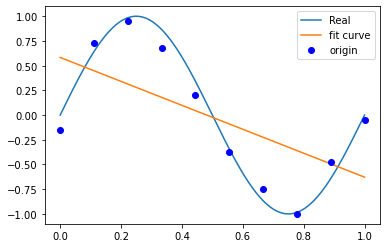

In [18]:
lsq1 = fitting(M =1)

拟合参数 [ 19.89724084 -29.77210915  10.03917955  -0.09369493]


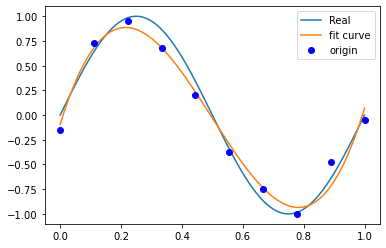

In [19]:
lsq3 = fitting(M =3)

拟合参数 [-1.32813433e+04  5.78884829e+04 -1.05940118e+05  1.05795093e+05
 -6.26678715e+04  2.23662535e+04 -4.62034329e+03  4.69908128e+02
 -9.96557530e+00 -1.48893939e-01]


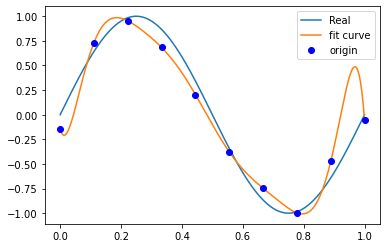

In [20]:
lsq9 = fitting(M =9)

# 正则化

In [17]:
learning_rate = 0.001
def Deviation_reg(d,x,y):
    dev = Deviation(d,x,y)
    reg = learning_rate *  np.sum( np.sqrt(np.square(d)) )
    return np.append(dev,reg)

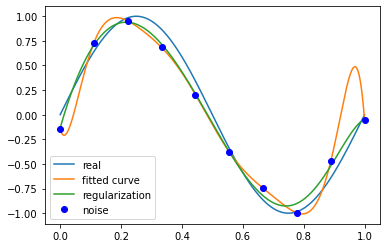

In [21]:
init = np.random.rand(9+1)
lsq_reg = leastsq(Deviation_reg,init,args = (x,y))


plt.plot(x_points, func(x_points), label='real')
plt.plot(x_points, poly(lsq9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    poly(lsq_reg[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()